In [1]:
import numpy as np #linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS # for data visualization
import folium  #for visualizing geospatial data
from matplotlib.pyplot import figure, show
import plotly.graph_objects as go
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import os  # accessing directory structur
import time
from matplotlib import cm
import pylab as pl

%matplotlib inline

In [2]:

batting_df = pd.read_csv('/Users/shivanimiraje/Downloads/archive-2/all_season_batting_card.csv', index_col=None, low_memory=False)
summary_df = pd.read_csv('/Users/shivanimiraje/Downloads/archive-2/all_season_summary.csv', index_col=None, low_memory=False)
bowling_df = pd.read_csv('/Users/shivanimiraje/Downloads/archive-2/all_season_bowling_card.csv', index_col=None, low_memory=False)

In [3]:
print('shape of summary dataframe', summary_df.shape)
print('shape of batting dataframe', batting_df.shape)
print('shape of bowling dataframe', bowling_df.shape)

shape of summary dataframe (1032, 45)
shape of batting dataframe (15720, 25)
shape of bowling dataframe (12121, 24)


In [4]:
summary_df.info()
batting_df.info()
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1029 non-null   float64
 1   id                1032 non-null   int64  
 2   name              1032 non-null   object 
 3   short_name        1032 non-null   object 
 4   description       1032 non-null   object 
 5   home_team         1032 non-null   object 
 6   away_team         1032 non-null   object 
 7   toss_won          1029 non-null   object 
 8   decision          1029 non-null   object 
 9   1st_inning_score  1021 non-null   object 
 10  2nd_inning_score  1019 non-null   object 
 11  home_score        1024 non-null   object 
 12  away_score        1021 non-null   object 
 13  winner            1032 non-null   object 
 14  result            1032 non-null   object 
 15  start_date        1032 non-null   object 
 16  end_date          1032 non-null   object 


In [5]:
columns_to_drop = columns_to_drop = ['name', 'short_name', 'description', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'result','venue_id', 'points', 'super_over', 'highlights', 'home_playx1', 'away_playx1','tv_umpire','referee','reserve_umpire']
summary_df.drop(columns=columns_to_drop, inplace=True)

In [6]:
columns_to_drop = columns_to_drop = ['match_name','minutes','fullName','shortText','strikeRate','captain','runningScore','runningOver','isNotOut','commentary','link']
batting_df.drop(columns=columns_to_drop, inplace=True)

In [7]:
columns_to_drop = columns_to_drop = ['href','captain','bowling_team','match_name','fullName','maidens','foursConceded','dots','sixesConceded']
bowling_df.drop(columns=columns_to_drop, inplace=True)

In [8]:
print('shape of summary dataframe', summary_df.shape)
print('shape of batting dataframe', batting_df.shape)
print('shape of bowling dataframe', bowling_df.shape)

shape of summary dataframe (1032, 28)
shape of batting dataframe (15720, 14)
shape of bowling dataframe (12121, 15)


In [9]:
summary_df.info()
batting_df.info()
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1029 non-null   float64
 1   id                1032 non-null   int64  
 2   home_team         1032 non-null   object 
 3   away_team         1032 non-null   object 
 4   toss_won          1029 non-null   object 
 5   decision          1029 non-null   object 
 6   winner            1032 non-null   object 
 7   start_date        1032 non-null   object 
 8   end_date          1032 non-null   object 
 9   venue_name        1032 non-null   object 
 10  home_captain      1029 non-null   object 
 11  away_captain      1029 non-null   object 
 12  pom               1029 non-null   object 
 13  home_overs        1021 non-null   float64
 14  home_runs         1021 non-null   float64
 15  home_wickets      1021 non-null   float64
 16  home_boundaries   1021 non-null   float64


In [10]:
import pandas as pd

# Assuming df is your DataFrame
cols_to_sum = ['overs', 'conceded', 'wickets', 'noballs', 'wides', 'economyRate']
# Convert columns to float if needed
bowling_df[cols_to_sum] = bowling_df[cols_to_sum].apply(pd.to_numeric, errors='coerce')

# Group by "match_id" and sum the specified columns
bowling_df_grouped_sum = bowling_df.groupby('match_id', as_index=False)[cols_to_sum[:-1]].sum()

# Calculate average economyRate
bowling_df_grouped_avg = bowling_df.groupby('match_id', as_index=False)['economyRate'].mean()

# Merge the sum and average DataFrames
bowling_df_grouped = pd.merge(bowling_df_grouped_sum, bowling_df_grouped_avg, on='match_id', how='left')

# Drop duplicate rows with the same 'match_id'
bowling_df.drop_duplicates(subset='match_id', inplace=True)

# Merge the grouped DataFrame back to the original DataFrame
bowling_df_merged = pd.merge(bowling_df, bowling_df_grouped, on='match_id', how='left')


In [11]:
bowling_df_merged.head(15)

season  match_id home_team away_team  \
0   2023.0   1359475        GT       CSK   
1   2023.0   1359476      PBKS       KKR   
2   2023.0   1359477       LSG        DC   
3   2023.0   1359478       SRH        RR   
4   2023.0   1359479       RCB        MI   
5   2023.0   1359480       CSK       LSG   
6   2023.0   1359481        DC        GT   
7   2023.0   1359482        RR      PBKS   
8   2023.0   1359483       KKR       RCB   
9   2023.0   1359484       LSG       SRH   
10  2023.0   1359485        RR        DC   
11  2023.0   1359486        MI       CSK   
12  2023.0   1359487        GT       KKR   
13  2023.0   1359488       SRH      PBKS   
14  2023.0   1359489       RCB       LSG   

                                                venue        city country  \
0            Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
1   Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh   India   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
3   Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
4                    M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   
5            MA Chidambaram Stadium, Chepauk, Chennai     Chennai   India   
6                         Arun Jaitley Stadium, Delhi       Delhi   India   
7                 Barsapara Cricket Stadium, Guwahati    Guwahati   India   
8                               Eden Gardens, Kolkata     Kolkata   India   
9   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
10                Barsapara Cricket Stadium, Guwahati    Guwahati   India   
11                           Wankhede Stadium, Mumbai      Mumbai   India   
12           Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
13  Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
14                   M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   

    innings_id            name  overs_x  ...  wickets_x  economyRate_x  \
0            1  Mohammed Shami      4.0  ...          2           7.25   
1            1        UT Yadav      4.0  ...          1           6.75   
2            1        KK Ahmed      4.0  ...          2           7.50   
3            1         B Kumar      3.0  ...          0          12.00   
4            1  Mohammed Siraj      4.0  ...          1           5.25   
5            1       KR Mayers      2.0  ...          0           8.00   
6            1  Mohammed Shami      4.0  ...          3          10.25   
7            1        TA Boult      4.0  ...          0           9.50   
8            1  Mohammed Siraj      4.0  ...          1          11.00   
9            1       KR Mayers      1.0  ...          0           5.00   
10           1        KK Ahmed      2.0  ...          0          15.50   
11           1       DL Chahar      1.0  ...          0          10.00   
12           1        UT Yadav      3.0  ...          0           8.00   
13           1         B Kumar      4.0  ...          1           8.25   
14           1      JD Unadkat      2.0  ...          0          13.50   

    wides_x  noballs_x  overs_y  conceded_y  wickets_y  noballs_y  wides_y  \
0         0          1     39.2         347         12          3        4   
1         0          0     36.0         333         12          3        3   
2         1          0     40.0         333         15          1       10   
3         1          0     40.0         327         13          3        5   
4         6          0     36.2         342          9          1       13   
5         1          0     40.0         412         14          4       16   
6         4          0     38.1         319         12          2        9   
7         1          0     40.0         387         10          1       11   
8         3          1     37.4         312         17          3        7   
9         0          0     36.0         244         12          0        7   
10        2          0 

In [12]:
import pandas as pd

# Assuming df is your DataFrame
cols_to_sum = ['runs','ballsFaced','fours','sixes']
# Convert columns to float if needed
batting_df[cols_to_sum] = batting_df[cols_to_sum].astype(float)

# Group by "match_id" and sum the specified columns
batting_df_grouped = batting_df.groupby('match_id', as_index=False)[cols_to_sum].sum()

# Drop duplicate rows with the same 'match_id'
batting_df.drop_duplicates(subset='match_id', inplace=True)

# Merge the grouped DataFrame back to the original DataFrame
batting_df_merged = pd.merge(batting_df, batting_df_grouped, on='match_id', how='left')

In [13]:
batting_df_merged.head(15)

season  match_id home_team away_team  \
0   2023.0   1359475        GT       CSK   
1   2023.0   1359476      PBKS       KKR   
2   2023.0   1359477       LSG        DC   
3   2023.0   1359478       SRH        RR   
4   2023.0   1359479       RCB        MI   
5   2023.0   1359480       CSK       LSG   
6   2023.0   1359481        DC        GT   
7   2023.0   1359482        RR      PBKS   
8   2023.0   1359483       KKR       RCB   
9   2023.0   1359484       LSG       SRH   
10  2023.0   1359485        RR        DC   
11  2023.0   1359486        MI       CSK   
12  2023.0   1359487        GT       KKR   
13  2023.0   1359488       SRH      PBKS   
14  2023.0   1359489       RCB       LSG   

                                                venue        city country  \
0            Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
1   Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh   India   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
3   Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
4                    M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   
5            MA Chidambaram Stadium, Chepauk, Chennai     Chennai   India   
6                         Arun Jaitley Stadium, Delhi       Delhi   India   
7                 Barsapara Cricket Stadium, Guwahati    Guwahati   India   
8                               Eden Gardens, Kolkata     Kolkata   India   
9   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
10                Barsapara Cricket Stadium, Guwahati    Guwahati   India   
11                           Wankhede Stadium, Mumbai      Mumbai   India   
12           Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
13  Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
14                   M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   

   current_innings  innings_id                name  runs_x  ballsFaced_x  \
0              CSK           1           DP Conway     1.0           6.0   
1             PBKS           1   Prabhsimran Singh    23.0          12.0   
2              LSG           1            KL Rahul     8.0          12.0   
3               RR           1         YBK Jaiswal    54.0          37.0   
4               MI           1           RG Sharma     1.0          10.0   
5              CSK           1          RD Gaikwad    57.0          31.0   
6               DC           1           DA Warner    37.0          32.0   
7             PBKS           1   Prabhsimran Singh    60.0          34.0   
8              KKR           1  Rahmanullah Gurbaz    57.0          44.0   
9              SRH           1    Anmolpreet Singh    31.0          26.0   
10              RR           1         YBK Jaiswal    60.0          31.0   
11              MI           1           RG Sharma    21.0          13.0   
12              GT           1             WP Saha    17.0          17.0   
13            PBKS           1   Prabhsimran Singh     0.0           1.0   
14             RCB           1             V Kohli    61.0          44.0   

    fours_x  sixes_x  runs_y  ballsFaced_y  fours_y  sixes_y  
0       0.0      0.0   340.0         239.0     25.0     21.0  
1       2.0      2.0   327.0         219.0     30.0     16.0  
2       0.0      1.0   318.0         241.0     20.0     18.0  
3       9.0      0.0   319.0         243.0     29.0     13.0  
4       0.0      0.0   327.0         219.0     26.0     20.0  
5       3.0      4.0   388.0         244.0     28.0     22.0  
6       7.0      0.0   302.0         231.0     29.0     11.0  
7       7.0      3.0   369.0         241.0     32.0     17.0  
8       6.0      3.0   298.0         229.0     30.0     13.0  
9       3.0      1.0   227.0         216.0     23.0      6.0  
10     11.0      1.0   325.0         242.0     38.0      7.0  
11      3.0      1.0   298.0         229.0     29.0      9.0  
12      3.0      0.0   391.0  

In [14]:
merged_df = batting_df_merged.merge(bowling_df_merged, on='match_id', how='outer')

final_df = merged_df.merge(summary_df, left_on='match_id', right_on='id', how='inner')

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 1023
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season_x          1021 non-null   float64
 1   match_id          1024 non-null   int64  
 2   home_team_x       1024 non-null   object 
 3   away_team_x       1024 non-null   object 
 4   venue_x           1024 non-null   object 
 5   city_x            1024 non-null   object 
 6   country_x         1024 non-null   object 
 7   current_innings   1024 non-null   object 
 8   innings_id_x      1024 non-null   int64  
 9   name_x            1024 non-null   object 
 10  runs_x            1024 non-null   float64
 11  ballsFaced_x      1024 non-null   float64
 12  fours_x           1024 non-null   float64
 13  sixes_x           1024 non-null   float64
 14  runs_y            1024 non-null   float64
 15  ballsFaced_y      1024 non-null   float64
 16  fours_y           1024 non-null   float64


In [16]:
print(final_df.isna().sum())

season_x             3
match_id             0
home_team_x          0
away_team_x          0
venue_x              0
                    ..
away_key_batsman     5
away_key_bowler     14
match_days           3
umpire1              3
umpire2              3
Length: 66, dtype: int64


In [17]:
final_df = final_df.dropna(axis=1, how='all')
final_df = final_df.dropna(axis=0, how='all')

In [18]:
final_df.shape

(1024, 66)

In [19]:
final_df.describe()

season_x      match_id  innings_id_x       runs_x  ballsFaced_x  \
count  1021.000000  1.024000e+03   1024.000000  1024.000000   1024.000000   
mean   2015.558276  8.687579e+05      1.002930    28.961914     22.299805   
std       4.633614  3.528920e+05      0.054074    27.518651     16.659753   
min    2008.000000  3.359820e+05      1.000000     0.000000      1.000000   
25%    2012.000000  5.483138e+05      1.000000     7.000000      9.000000   
50%    2015.000000  8.298140e+05      1.000000    21.000000     18.000000   
75%    2020.000000  1.216503e+06      1.000000    43.250000     33.000000   
max    2023.000000  1.370353e+06      2.000000   175.000000     70.000000   

           fours_x      sixes_x       runs_y  ballsFaced_y      fours_y  ...  \
count  1024.000000  1024.000000  1024.000000   1024.000000  1024.000000  ...   
mean      3.103516     1.034180   297.989258    230.477539    26.990234  ...   
std       2.942430     1.726625    55.846379     20.779753     6.801465  ...   
min       0.000000     0.000000    51.000000     51.000000     3.000000  ...   
25%       1.000000     0.000000   265.000000    230.000000    22.000000  ...   
50%       2.000000     0.000000   300.000000    238.000000    27.000000  ...   
75%       5.000000     1.000000   333.250000    241.000000    32.000000  ...   
max      16.000000    17.000000   448.000000    245.000000    51.000000  ...   

            season            id   home_overs    home_runs  home_wickets  \
count  1021.000000  1.024000e+03  1021.000000  1021.000000   1021.000000   
mean   2015.558276  8.687579e+05    19.090597   158.328110      5.791381   
std       4.633614  3.528920e+05     2.094547    31.936013      2.407212   
min    2008.000000  3.359820e+05     1.100000     2.000000      0.000000   
25%    2012.000000  5.483138e+05    19.200000   138.000000      4.000000   
50%    2015.000000  8.298140e+05    20.000000   160.000000      6.000000   
75%    2020.000000  1.216503e+06    20.000000   180.000000      8.000000   
max    2023.000000  1.370353e+06    20.000000   263.000000     10.000000   

       home_boundaries   away_overs    away_runs  away_wickets  \
count      1021.000000  1019.000000  1019.000000    1019.00000   
mean         19.406464    19.077233   155.934249       5.96369   
std           5.857484     2.116901    31.257009       2.51003   
min           0.000000     3.200000    41.000000       0.00000   
25%          15.000000    19.200000   137.000000       4.00000   
50%          19.000000    20.000000   158.000000       6.00000   
75%          23.000000    20.000000   176.000000       8.00000   
max          42.000000    20.000000   257.000000      10.00000   

       away_boundaries  
count      1019.000000  
mean         19.103042  
std           5.668493  
min           3.000000  
25%          15.000000  
50%          19.000000  
75%          23.000000  
max          41.000000  

[8 rows x 35 columns]

In [20]:
final_df.isna().sum()

season_x             3
match_id             0
home_team_x          0
away_team_x          0
venue_x              0
                    ..
away_key_batsman     5
away_key_bowler     14
match_days           3
umpire1              3
umpire2              3
Length: 66, dtype: int64

In [21]:
threshold = 0.2

# For DataFrame 'db'
final_df = final_df.dropna(axis=1, thresh=int(final_df.shape[0] * threshold))

In [22]:
# Assuming 'df' is your DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(final_df.dtypes)


season_x            float64
match_id              int64
home_team_x          object
away_team_x          object
venue_x              object
city_x               object
country_x            object
current_innings      object
innings_id_x          int64
name_x               object
runs_x              float64
ballsFaced_x        float64
fours_x             float64
sixes_x             float64
runs_y              float64
ballsFaced_y        float64
fours_y             float64
sixes_y             float64
season_y            float64
home_team_y          object
away_team_y          object
venue_y              object
city_y               object
country_y            object
innings_id_y          int64
name_y               object
overs_x             float64
conceded_x            int64
wickets_x             int64
economyRate_x       float64
wides_x               int64
noballs_x             int64
overs_y             float64
conceded_y            int64
wickets_y             int64
noballs_y           

In [23]:
# Assuming 'df' is your DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 1023
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season_x          1021 non-null   float64
 1   match_id          1024 non-null   int64  
 2   home_team_x       1024 non-null   object 
 3   away_team_x       1024 non-null   object 
 4   venue_x           1024 non-null   object 
 5   city_x            1024 non-null   object 
 6   country_x         1024 non-null   object 
 7   current_innings   1024 non-null   object 
 8   innings_id_x      1024 non-null   int64  
 9   name_x            1024 non-null   object 
 10  runs_x            1024 non-null   float64
 11  ballsFaced_x      1024 non-null   float64
 12  fours_x           1024 non-null   float64
 13  sixes_x           1024 non-null   float64
 14  runs_y            1024 non-null   float64
 15  ballsFaced_y      1024 non-null   float64
 16  fours_y           1024 non-null   float64


In [24]:
# Assuming 'final_df' is your DataFrame
final_df = final_df.dropna(subset=['season_x'])


In [25]:
from sklearn.impute import SimpleImputer

# Select columns with float or int values
numerical_columns = final_df.select_dtypes(include=['float', 'int']).columns

# Create the imputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer on the selected columns
dataNew = final_df.copy()
dataNew[numerical_columns] = imputer.fit_transform(final_df[numerical_columns])


In [26]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print null value counts for each column
print(final_df.isnull().sum())

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


season_x             0
match_id             0
home_team_x          0
away_team_x          0
venue_x              0
city_x               0
country_x            0
current_innings      0
innings_id_x         0
name_x               0
runs_x               0
ballsFaced_x         0
fours_x              0
sixes_x              0
runs_y               0
ballsFaced_y         0
fours_y              0
sixes_y              0
season_y             0
home_team_y          0
away_team_y          0
venue_y              0
city_y               0
country_y            0
innings_id_y         0
name_y               0
overs_x              0
conceded_x           0
wickets_x            0
economyRate_x        0
wides_x              0
noballs_x            0
overs_y              0
conceded_y           0
wickets_y            0
noballs_y            0
wides_y              0
economyRate_y        0
season               0
id                   0
home_team            0
away_team            0
toss_won             0
decision   

In [27]:
import pandas as pd

# Assuming final_df is your DataFrame
columns_to_drop = ['away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'home_key_batsman', 'home_key_bowler', 'away_key_batsman', 'away_key_bowler']

final_df_cleaned = final_df.drop(columns=columns_to_drop)


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming final_df_cleaned is your DataFrame without the specified columns
numeric_columns = final_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df_cleaned[numeric_columns])
final_df_scaled = pd.DataFrame(final_df_scaled, columns=numeric_columns)


In [35]:
# Calculate the variance of each column
variances = final_df.var()

# Define the threshold for low variance (e.g., 0.08)
threshold = 0.08

# Drop columns with variance below the threshold
low_variance_cols = []
for col, variance in variances.items():
    if variance < threshold:
        low_variance_cols.append(col)

final_df_high_variance = final_df.drop(columns=low_variance_cols)

# Print the new DataFrame
print('New DataFrame with attributes having variance >= 8%:\n', final_df_high_variance)



New DataFrame with attributes having variance >= 8%:
       season_x  match_id home_team_x away_team_x  \
0       2023.0   1359475          GT         CSK   
1       2023.0   1359476        PBKS         KKR   
2       2023.0   1359477         LSG          DC   
3       2023.0   1359478         SRH          RR   
4       2023.0   1359479         RCB          MI   
...        ...       ...         ...         ...   
1019    2008.0    336012         RCB          MI   
1020    2008.0    336019        KXIP          RR   
1021    2008.0    336038          DC          RR   
1022    2008.0    336039         CSK        KXIP   
1023    2008.0    336040         CSK          RR   

                                                venue_x      city_x country_x  \
0              Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad     India   
1     Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh     India   
2     Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow     India 

/var/folders/y3/6mdnwm353dsc_v762rvb_d2w0000gn/T/ipykernel_12041/1318444448.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = final_df.var()


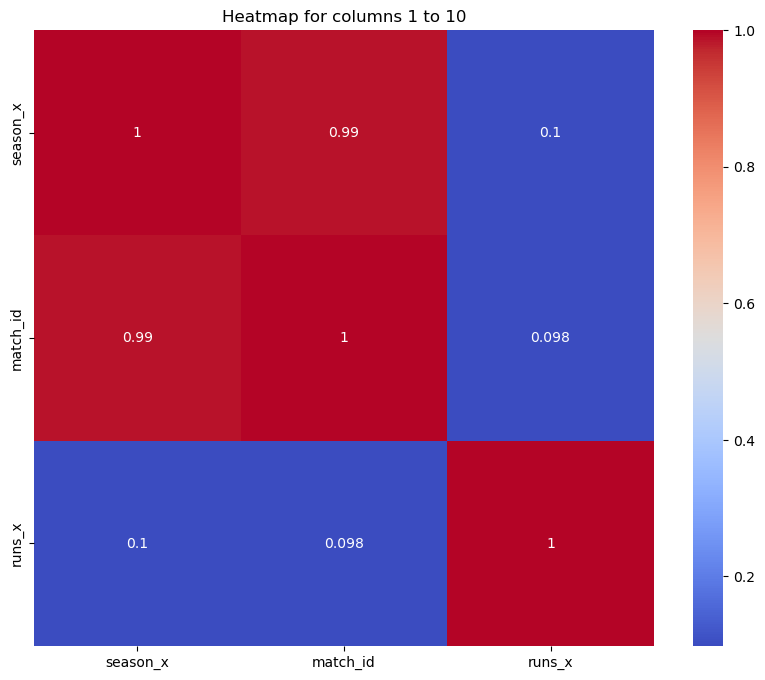

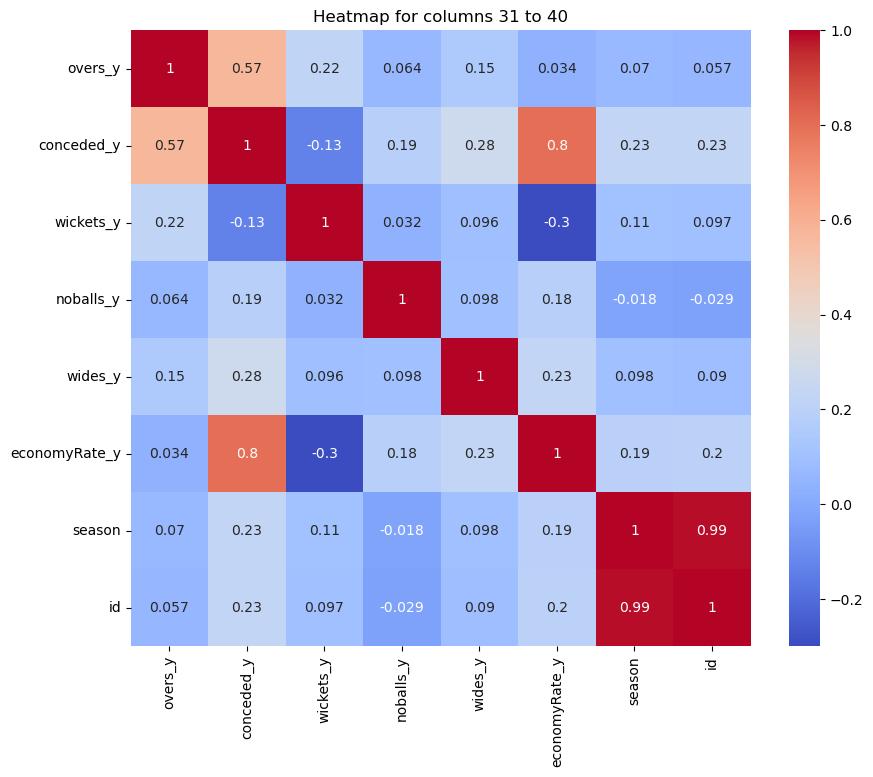

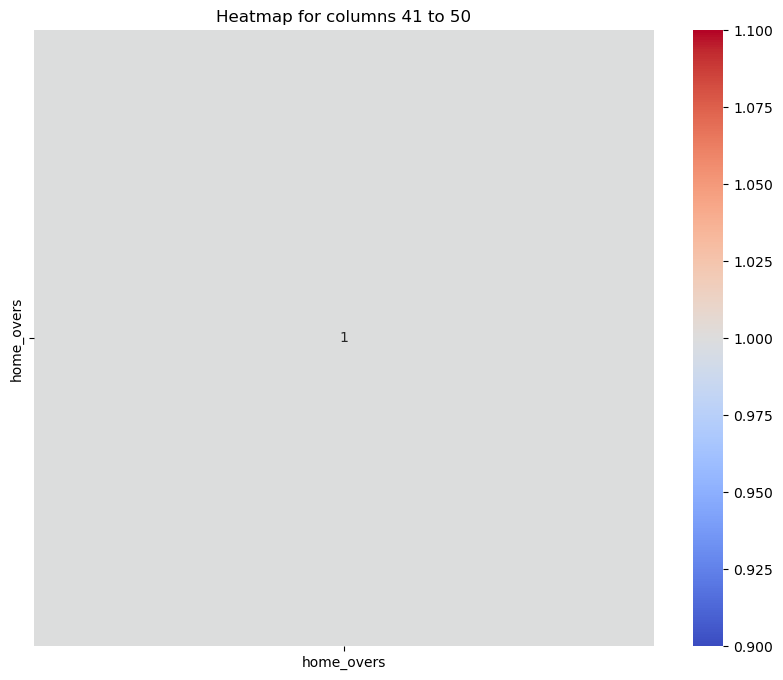

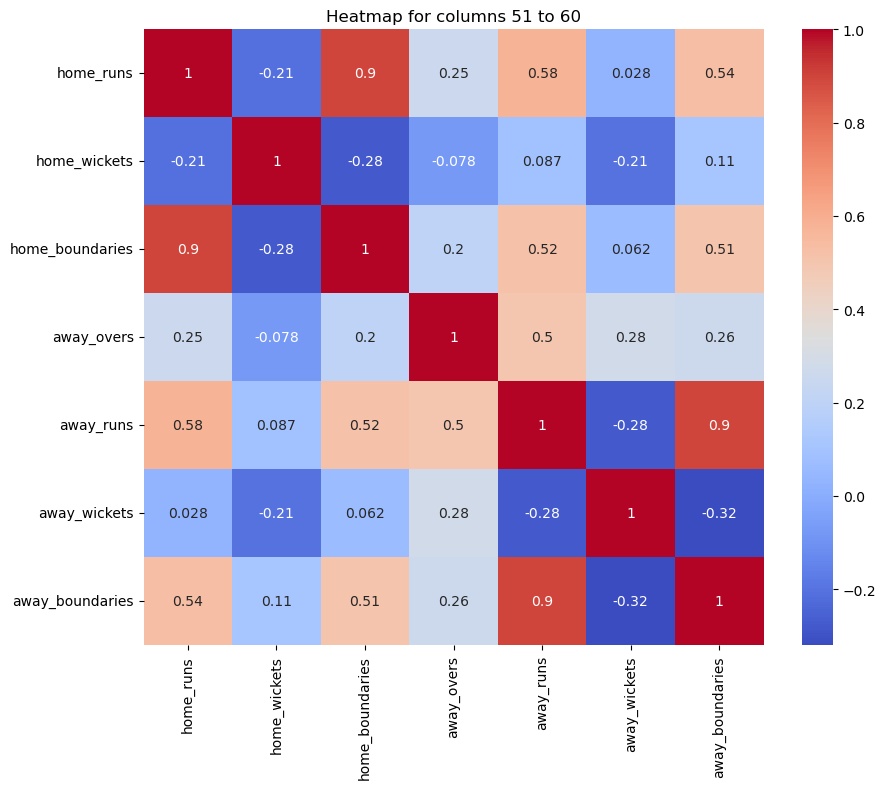

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

num_cols = len(final_df_high_variance.columns)

# Make sure 'Diagnosis' column is in the dataframe
if 'winner' not in final_df_high_variance.columns:
    print("The 'winner' column does not exist in the dataframe.")

for i in range(0, num_cols, 10):
    if i+10 < num_cols:
        cols = final_df_high_variance.columns[i:i+10]
    else:
        cols = final_df_high_variance.columns[i:]

    if 'winner' not in cols:
        cols = cols.insert(len(cols), 'winner')

    corr = final_df_high_variance[cols].corr()
    plt.figure(figsize=(10,8))
    sb.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {i+10}")
    plt.show()

In [39]:
import pandas as pd

corr_matrix = final_df_high_variance.corr().abs()

# Find pairs of features with correlation above 0.6
highly_correlated = (corr_matrix > 0.6) & (corr_matrix < 1.0)
pairs_above_threshold = [(i, j, corr_matrix.iloc[i, j]) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[1]) if highly_correlated.iloc[i, j]]

# Print the pairs of features with correlation above 0.6
if len(pairs_above_threshold) == 0:
    print('No pairs of features with correlation above 0.6')
else:
    print('Pairs of features with correlation above 0.6:')
    for pair in pairs_above_threshold:
        print(f"{final_df_high_variance.columns[pair[0]]} and {final_df_high_variance.columns[pair[1]]} - Correlation: {pair[2]}")

Pairs of features with correlation above 0.6:
season_x and match_id - Correlation: 0.9878832170232378
season_x and overs_x - Correlation: 0.9878832170232378
match_id and ballsFaced_x - Correlation: 0.9878832170232369
match_id and name_y - Correlation: 0.9878832170232369
home_team_x and away_team_x - Correlation: 0.9447799560810428
home_team_x and venue_x - Correlation: 0.8827051289932157
home_team_x and city_x - Correlation: 0.7874912778965216
away_team_x and venue_x - Correlation: 0.8305116698755457
away_team_x and city_x - Correlation: 0.6398091059816702
country_x and name_x - Correlation: 0.7189615717062067
country_x and runs_x - Correlation: 0.7667223361293719
country_x and home_team_y - Correlation: 0.9964867662875123
country_x and country_y - Correlation: 0.7954395473232332
country_x and wickets_x - Correlation: 0.8822239096174047
country_x and wides_x - Correlation: 0.7959774024496074
country_x and overs_y - Correlation: 0.8799858278024274
country_x and wickets_y - Correlation: 

In [41]:
col_names =['name_x','runs_x','home_team_y','country_y','wickets_x','wides_x','overs_y','wickets_y', ]
df2 = final_df_high_variance.drop(columns=col_names)

In [45]:
column_list = final_df_high_variance.columns.tolist()
print(column_list)

['season_x', 'match_id', 'home_team_x', 'away_team_x', 'venue_x', 'city_x', 'country_x', 'current_innings', 'name_x', 'runs_x', 'ballsFaced_x', 'fours_x', 'sixes_x', 'runs_y', 'ballsFaced_y', 'fours_y', 'sixes_y', 'season_y', 'home_team_y', 'away_team_y', 'venue_y', 'city_y', 'country_y', 'name_y', 'overs_x', 'conceded_x', 'wickets_x', 'economyRate_x', 'wides_x', 'noballs_x', 'overs_y', 'conceded_y', 'wickets_y', 'noballs_y', 'wides_y', 'economyRate_y', 'season', 'id', 'home_team', 'away_team', 'toss_won', 'decision', 'winner', 'start_date', 'end_date', 'venue_name', 'home_captain', 'away_captain', 'pom', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'home_key_batsman', 'home_key_bowler', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2']


In [50]:
from sklearn.model_selection import train_test_split
X = final_df_high_variance.columns.tolist()
X = final_df_high_variance[['season_x', 'match_id', 'home_team_x', 'away_team_x', 'venue_x', 'city_x', 'country_x', 'current_innings', 'name_x', 'runs_x', 'ballsFaced_x', 'fours_x', 'sixes_x', 'runs_y', 'ballsFaced_y', 'fours_y', 'sixes_y', 'season_y', 'home_team_y', 'away_team_y', 'venue_y', 'city_y', 'country_y', 'name_y', 'overs_x', 'conceded_x', 'wickets_x', 'economyRate_x', 'wides_x', 'noballs_x', 'overs_y', 'conceded_y', 'wickets_y', 'noballs_y', 'wides_y', 'economyRate_y', 'season', 'id', 'home_team', 'away_team', 'toss_won', 'decision', 'start_date', 'end_date', 'venue_name', 'home_captain', 'away_captain', 'pom', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'home_key_batsman', 'home_key_bowler', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2']]
y =final_df_high_variance[['winner']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: could not convert string to float: 'RCB'

In [51]:
from sklearn.model_selection import train_test_split
X = final_df_high_variance.columns.tolist()
X = final_df_high_variance[['season_x', 'match_id', 'home_team_x', 'away_team_x', 'venue_x', 'city_x', 'country_x', 'current_innings', 'name_x', 'runs_x', 'ballsFaced_x', 'fours_x', 'sixes_x', 'runs_y', 'ballsFaced_y', 'fours_y', 'sixes_y', 'season_y', 'home_team_y', 'away_team_y', 'venue_y', 'city_y', 'country_y', 'name_y', 'overs_x', 'conceded_x', 'wickets_x', 'economyRate_x', 'wides_x', 'noballs_x', 'overs_y', 'conceded_y', 'wickets_y', 'noballs_y', 'wides_y', 'economyRate_y', 'season', 'id', 'home_team', 'away_team', 'toss_won', 'decision', 'start_date', 'end_date', 'venue_name', 'home_captain', 'away_captain', 'pom', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'home_key_batsman', 'home_key_bowler', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2']]
y =final_df_high_variance[['winner']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: could not convert string to float: 'RCB'